#Author Jonathan Johnson

In [1]:
!pip install splunk-sdk
!pip install pandas
!pip install pandasql
import matplotlib.pyplot as plt
import pandas as pd
import pandasql
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 0)

In [2]:
import splunklib.client as client
# Create a Service instance and log in 
service = client.connect(
    host='192.168.0.0', #Input your Splunk's IP here
    port='8089',
    username="admin",
    password="Changeme1!",
    scheme='https')

In [3]:
import splunklib.results as results
from tqdm.notebook import tqdm
from time import sleep
#First Query: 
query = "search index=main sourcetype=wineventlog:security EventCode=4662 Access_Mask=0x100 Object_Type=domainDNS Account_Name!=*$"
query_results = service.jobs.oneshot(query, count=0)
reader = results.ResultsReader(query_results)


results = []
for result in reader:
    results.append(result)
    
for i in tqdm(results):
    sleep(0.01)
    df_EID_4662=pd.DataFrame(results)
    
    

In [4]:
import splunklib.results as results
#First Query: 
query = "search index=main sourcetype=wineventlog:security EventCode=5156 Direction=Inbound Protocol=6 Application_Name=*lsass.exe | head 2000"
query_results = service.jobs.oneshot(query, count=0)
reader = results.ResultsReader(query_results)

results = []

for result in reader:
    results.append(result)
    
df_EID_5156=pd.DataFrame(results)

In [5]:
import splunklib.results as results
#First Query: 
query = "search index=main sourcetype=wineventlog:security EventCode=4624 Account_Name!=*$ Logon_Type=3 | head 1000"
query_results = service.jobs.oneshot(query, count=0)
reader = results.ResultsReader(query_results)

results = []

for result in reader:
    results.append(result)
    
df_EID_4624=pd.DataFrame(results)

In [6]:
import splunklib.results as results
#First Query: 
query = "search index=main sourcetype=wineventlog:microsoft-windows-sysmon/operational EventCode=3 Image!=*svchost.exe SourceHostname!=*DC.marvel.local  | head 1000"
query_results = service.jobs.oneshot(query, count=0)
reader = results.ResultsReader(query_results)

results = []

for result in reader:
    results.append(result)
    
df_EID_3=pd.DataFrame(results)

In [7]:
import splunklib.results as results
#First Query: 
query = "search index=main sourcetype=dce_rpc-too_small  endpoint= drsuapi  | head 2000"
query_results = service.jobs.oneshot(query, count=0)
reader = results.ResultsReader(query_results)

results = []

for result in reader:
    results.append(result)
    
df_dce_rpc=pd.DataFrame(results)

In [8]:
import json
df2=df_dce_rpc._raw
dfj = [json.loads(j) for j in df2]
drsuapi_zeek_df = pd.DataFrame(dfj)

In [9]:
df2_EID_4662 = df_EID_4662.Message
df2_EID_4624 = df_EID_4624.Message
df2_EID_5156 = df_EID_5156.Message
df2_EID_3 = df_EID_3.Message

In [10]:
df2_EID_4662 = df_EID_4662.Message

In [11]:
df3_EID_4662 = df2_EID_4662.str.split('\n')
df3_EID_4624 = df2_EID_4624.str.split('\n')
df3_EID_5156 = df2_EID_5156.str.split('\n')
df3_EID_3 = df2_EID_3.str.split('\n')

In [12]:
df5_EID_4662 = [{a.split(":")[0].strip():":".join(a.split(":")[1:]).strip() for a in b if ":".join(a.split(":")[1:]).strip() != ''} for b in df3_EID_4662]
df5_EID_4624 = [{a.split(":")[0].strip():":".join(a.split(":")[1:]).strip() for a in b if ":".join(a.split(":")[1:]).strip() != ''} for b in df3_EID_4624]
df5_EID_5156 = [{a.split(":")[0].strip():":".join(a.split(":")[1:]).strip() for a in b if ":".join(a.split(":")[1:]).strip() != ''} for b in df3_EID_5156]
df5_EID_3 = [{a.split(":")[0].strip():":".join(a.split(":")[1:]).strip() for a in b if ":".join(a.split(":")[1:]).strip() != ''} for b in df3_EID_3]

In [13]:
df6_EID_4662 = pd.DataFrame(df5_EID_4662)
df6_EID_4624 = pd.DataFrame(df5_EID_4624)
df6_EID_5156 = pd.DataFrame(df5_EID_5156)
df6_EID_3 = pd.DataFrame(df5_EID_3)

In [14]:
df = df6_EID_5156['Application Name'].str.split('\\').str[-1]
df1 = df6_EID_3['Image'].str.split('\\').str[-1]

In [15]:
df6_EID_5156.update(df)
df6_EID_3.update(df1)

In [16]:
from pandasql import sqldf
EID_4662_df = pandasql.sqldf(
"""
SELECT 
a."Account Name",
a."Logon ID", 
a."Object Name", 
a."Access Mask",
a."Object Type", 
a.Properties
FROM df6_EID_4662 a
WHERE a."Account Name" NOT LIKE "%$"
AND a."Access Mask" = "0x100"
"""

)

In [17]:
display(EID_4662_df)

,Account Name,Logon ID,Object Name,Access Mask,Object Type,Properties
0,thor,0xC6D59,"DC=marvel,DC=local",0x100,domainDNS,Control Access
1,thor,0xC6D59,"DC=marvel,DC=local",0x100,domainDNS,Control Access
2,thor,0xC6D59,"DC=marvel,DC=local",0x100,domainDNS,Control Access
3,thor,0xC6D59,"DC=marvel,DC=local",0x100,domainDNS,Control Access
4,thor,0xC6D59,"DC=marvel,DC=local",0x100,domainDNS,Control Access
5,thor,0xC6D59,"DC=marvel,DC=local",0x100,domainDNS,Control Access
6,thor,0xC6D59,"DC=marvel,DC=local",0x100,domainDNS,Control Access
7,thor,0xC6D59,"DC=marvel,DC=local",0x100,domainDNS,Control Access
8,thor,0xC6D59,"DC=marvel,DC=local",0x100,domainDNS,Control Access
9,thor,0xC6D59,"DC=marvel,DC=local",0x100,domainDNS,Control Access


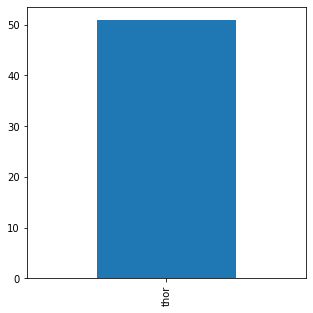

In [18]:
(EID_4662_df)['Account Name'].value_counts().plot(x='Account Name', kind='bar', figsize=(5,5))

In [23]:
from pandasql import sqldf
EID_4662_4624_df = pandasql.sqldf(
"""
SELECT 
a."Account Name",
a."Logon ID", 
a."Object Name", 
a."Access Mask",
a.Properties, 
b."Source Port"
FROM df6_EID_4662 a
JOIN df6_EID_4624 b
ON a."Logon ID" = b."Logon ID"
AND b."Logon Type" = 3
WHERE a."Account Name" NOT LIKE "%$"
AND a."Access Mask" = "0x100"
"""

)

In [24]:
display(EID_4662_4624_df)

,Account Name,Logon ID,Object Name,Access Mask,Properties,Source Port
0,thor,0xC6D59,"DC=marvel,DC=local",0x100,Control Access,49784
1,thor,0xC6D59,"DC=marvel,DC=local",0x100,Control Access,49784
2,thor,0xC6D59,"DC=marvel,DC=local",0x100,Control Access,49784
3,thor,0xC6D59,"DC=marvel,DC=local",0x100,Control Access,49784
4,thor,0xC6D59,"DC=marvel,DC=local",0x100,Control Access,49784
5,thor,0xC6D59,"DC=marvel,DC=local",0x100,Control Access,49784
6,thor,0x88E6A3,"DC=marvel,DC=local",0x100,Control Access,50079
7,thor,0x88E6A3,"DC=marvel,DC=local",0x100,Control Access,50079
8,thor,0x88E6A3,"DC=marvel,DC=local",0x100,Control Access,50079
9,thor,0x88E6A3,"DC=marvel,DC=local",0x100,Control Access,50079


In [27]:
from pandasql import sqldf
Zeek_EID_5156 = pandasql.sqldf(
"""
SELECT 
c."Source Address",
c."Destination Address",
c."Source Port",
c."Destination Port", 
c."Application Name", 
d."operation"
FROM df6_EID_5156 c
JOIN drsuapi_zeek_df d
ON d."id.orig_h" = c."Source Address"
AND d."id.orig_h" != "192.168.72.3" -- Originating IP is NOT a DC
AND d."id.resp_h" = "192.168.72.3" -- Remote IP IS a DC
AND d."operation" = "DRSGetNCChanges"
WHERE c."Application Name" = "lsass.exe"
AND NOT (c."Destination Port" = 88 OR c."Destination Port" = 389) 
"""

)

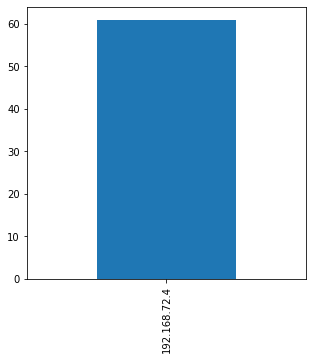

In [38]:
df_Zeek_EID_5156_map = (Zeek_EID_5156)['Source Address'].value_counts()
df_Zeek_EID_5156_map.plot(kind='bar', figsize=(5,5)) #If the source address is not a DC, this is malicous

In [39]:
display(Zeek_EID_5156)

,Source Address,Destination Address,Source Port,Destination Port,Application Name,operation
0,192.168.72.4,192.168.72.3,50065,49672,lsass.exe,DRSGetNCChanges
1,192.168.72.4,192.168.72.3,50064,49668,lsass.exe,DRSGetNCChanges
2,192.168.72.4,192.168.72.3,50053,49668,lsass.exe,DRSGetNCChanges
3,192.168.72.4,192.168.72.3,50013,49672,lsass.exe,DRSGetNCChanges
4,192.168.72.4,192.168.72.3,50012,49668,lsass.exe,DRSGetNCChanges
...,...,...,...,...,...,...
56,192.168.72.4,192.168.72.3,50147,49672,lsass.exe,DRSGetNCChanges
57,192.168.72.4,192.168.72.3,50130,49668,lsass.exe,DRSGetNCChanges
58,192.168.72.4,192.168.72.3,50130,49668,lsass.exe,DRSGetNCChanges
59,192.168.72.4,192.168.72.3,50115,49668,lsass.exe,DRSGetNCChanges


In [29]:
from pandasql import sqldf
EID_4662_4624_5156_Zeek_df = pandasql.sqldf(
"""
SELECT 
a."Account Name",
a."Logon ID", 
a."Object Name", 
a."Access Mask",
a.Properties, 
c."Source Address",
c."Source Port",
d."endpoint",
d."operation",
c."Destination Port",
c."Destination Address",
c."Application Name"
FROM df6_EID_4662 a 
JOIN df6_EID_4624 b
ON a."Logon ID" = b."Logon ID"
JOIN df6_EID_5156 c
ON c."Source Address" = b."Source Network Address"
AND b."Source Port" = c."Source Port"
AND NOT (c."Destination Port" = 88 OR c."Destination Port" = 389)
JOIN drsuapi_zeek_df d
ON d."id.orig_h" = c."Source Address"
AND d."operation" = "DRSGetNCChanges"
AND d."id.orig_h" != "192.168.72.3" -- Originating IP is NOT a DC
AND d."id.resp_h" = "192.168.72.3" -- Remote IP IS a DC
"""

)

In [30]:
display(EID_4662_4624_5156_Zeek_df)

,Account Name,Logon ID,Object Name,Access Mask,Properties,Source Address,Source Port,endpoint,operation,Destination Port,Destination Address,Application Name
0,thor,0xC6D59,"DC=marvel,DC=local",0x100,Control Access,192.168.72.4,49784,drsuapi,DRSGetNCChanges,49668,192.168.72.3,lsass.exe
1,thor,0xC6D59,"DC=marvel,DC=local",0x100,Control Access,192.168.72.4,49784,drsuapi,DRSGetNCChanges,49668,192.168.72.3,lsass.exe
2,thor,0xC6D59,"DC=marvel,DC=local",0x100,Control Access,192.168.72.4,49784,drsuapi,DRSGetNCChanges,49668,192.168.72.3,lsass.exe
3,thor,0xC6D59,"DC=marvel,DC=local",0x100,Control Access,192.168.72.4,49784,drsuapi,DRSGetNCChanges,49668,192.168.72.3,lsass.exe
4,thor,0xC6D59,"DC=marvel,DC=local",0x100,Control Access,192.168.72.4,49784,drsuapi,DRSGetNCChanges,49668,192.168.72.3,lsass.exe
...,...,...,...,...,...,...,...,...,...,...,...,...
79,thor,0x75E6EF,"DC=marvel,DC=local",0x100,Control Access,192.168.72.4,50475,drsuapi,DRSGetNCChanges,49668,192.168.72.3,lsass.exe
80,thor,0x75E6EF,"DC=marvel,DC=local",0x100,Control Access,192.168.72.4,50475,drsuapi,DRSGetNCChanges,49668,192.168.72.3,lsass.exe
81,thor,0x75E6EF,"DC=marvel,DC=local",0x100,Control Access,192.168.72.4,50475,drsuapi,DRSGetNCChanges,49668,192.168.72.3,lsass.exe
82,thor,0x75E6EF,"DC=marvel,DC=local",0x100,Control Access,192.168.72.4,50475,drsuapi,DRSGetNCChanges,49668,192.168.72.3,lsass.exe


In [ ]:
from pandasql import sqldf
EID_4662_4624_5156_3_Zeekdf = pandasql.sqldf(
"""
SELECT 
a."Account Name",
a."Logon ID", 
a."Object Name", 
a."Access Mask",
a.Properties, 
c."Source Address",
b."Source Port",
e."endpoint",
e."operation",
c."Destination Port", 
c."Destination Address",
c."Application Name"
FROM df6_EID_4662 a
JOIN df6_EID_4624 b
ON a."Logon ID" = b."Logon ID"
JOIN df6_EID_5156 c
ON c."Source Address" = b."Source Network Address"
AND b."Source Port" = c."Source Port"
AND NOT (c."Destination Port" = 88 OR c."Destination Port" = 389)
JOIN df6_EID_3 d
ON d.SourceIp = c."Source Address"
AND d.Image = c."Application Name"
JOIN drsuapi_zeek_df e
ON e."id.orig_h" = c."Source Address"
AND e."operation" = "DRSGetNCChanges"
AND e."id.orig_h" != "192.168.72.3" -- Originating IP is NOT a DC
AND e."id.resp_h" = "192.168.72.3" -- Remote IP IS a DC
"""

)

In [ ]:
display(EID_4662_4624_5156_3_Zeekdf)